In [1]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.9MB 6.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 9.1MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [3]:
!python3 --version

Python 3.6.9


In [4]:
pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

  Cloning https://github.com/scikit-learn-contrib/imbalanced-learn.git to /tmp/pip-req-build-h4sz0qnn
  Running command git clone -q https://github.com/scikit-learn-contrib/imbalanced-learn.git /tmp/pip-req-build-h4sz0qnn
  Created wheel for imbalanced-learn: filename=imbalanced_learn-0.7.0-cp36-none-any.whl size=178920 sha256=b707c2baf664b48ebcb1fb5350919c4ccbd039f41a3b77514124ffb3fabf21f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-uhsp798k/wheels/6c/07/cf/38cb9b7cc9e6a0ac7648a80ec192b6f2d863405fb0049ac0ff
Successfully built imbalanced-learn
  Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0


In [5]:
!pip install imblearn

In [6]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [7]:
import pandas as pd     # package for data analysis
import numpy as np      # package for numerical computations

# libraries for visualization
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression     # Logistic regression model
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical
from statistics import mean 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error   # for model evaluation

%matplotlib inline

In [8]:
# In read_csv() function, we have passed the location to where the file is located at dphi official github page
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
loan_data.shape

(491, 14)

In [9]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.shape

(123, 12)

In [10]:
loan_data.head()       # head() returns you the first five rows of the data. Similarly, you can use tail() to get last 5 rows of data

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [11]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [12]:
loan_data.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
loan_data.info

<bound method DataFrame.info of      Unnamed: 0   Loan_ID  Gender  ... Credit_History Property_Area Loan_Status
0             0  LP002305  Female  ...            1.0     Semiurban           1
1             1  LP001715    Male  ...            1.0         Rural           1
2             2  LP002086  Female  ...            1.0         Urban           0
3             3  LP001136    Male  ...            1.0         Urban           1
4             4  LP002529    Male  ...            1.0     Semiurban           1
..          ...       ...     ...  ...            ...           ...         ...
486         486  LP002103     NaN  ...            1.0         Urban           1
487         487  LP001790  Female  ...            1.0         Rural           1
488         488  LP001401    Male  ...            1.0         Rural           1
489         489  LP002893    Male  ...            1.0         Urban           0
490         490  LP002777    Male  ...            1.0         Rural           1

[491 ro

In [14]:
loan_count_of_missval_by_col = (loan_data.isnull().sum())
loan_count_of_missval_by_col

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan_data1 = loan_data.dropna(subset=['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

In [16]:
loan_data1.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               1
Dependents            8
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
loan_data1['Gender'].fillna('Not Specified', inplace = True)
loan_data1['Gender'].value_counts(normalize=True)*100

Male             79.285714
Female           18.571429
Not Specified     2.142857
Name: Gender, dtype: float64

In [18]:
loan_data1['Married'].fillna('Not Specified', inplace = True)
loan_data1['Married'].value_counts(normalize=True)*100

Yes              65.000000
No               34.761905
Not Specified     0.238095
Name: Married, dtype: float64

In [19]:
loan_data1['Dependents'].fillna(loan_data1['Dependents'].mode()[0], inplace = True)
loan_data1['Dependents'].value_counts(normalize=True)*100

0     57.142857
1     17.142857
2     16.666667
3+     9.047619
Name: Dependents, dtype: float64

In [20]:
loan_data1['Self_Employed'].fillna('Not Specified', inplace = True)
loan_data1['Self_Employed'].value_counts(normalize=True)*100

No               81.666667
Yes              13.095238
Not Specified     5.238095
Name: Self_Employed, dtype: float64

In [21]:
loan_data1.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
test_count_of_missval_by_col = (test_data.isnull().sum())
test_count_of_missval_by_col

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [23]:
test_data['Gender'].fillna('Not Specified', inplace = True)
test_data['Gender'].value_counts(normalize=True)*100

Male             78.048780
Female           19.512195
Not Specified     2.439024
Name: Gender, dtype: float64

In [24]:
test_data['Married'].fillna('Not Specified', inplace = True)
test_data['Married'].value_counts(normalize=True)*100

Yes              60.162602
No               38.211382
Not Specified     1.626016
Name: Married, dtype: float64

In [25]:
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace = True)
test_data['Dependents'].value_counts(normalize=True)*100

0     60.975610
2     18.699187
1     13.821138
3+     6.504065
Name: Dependents, dtype: float64

In [26]:
test_data['Self_Employed'].fillna('Not Specified', inplace = True)
test_data['Self_Employed'].value_counts(normalize=True)*100

No               82.926829
Yes              14.634146
Not Specified     2.439024
Name: Self_Employed, dtype: float64

In [27]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace = True)
test_data['LoanAmount'].value_counts(normalize=True)*100

152.08547    4.878049
125.00000    3.252033
187.00000    3.252033
110.00000    3.252033
120.00000    2.439024
               ...   
65.00000     0.813008
180.00000    0.813008
496.00000    0.813008
170.00000    0.813008
81.00000     0.813008
Name: LoanAmount, Length: 87, dtype: float64

In [28]:
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace = True)
test_data['Loan_Amount_Term'].value_counts(normalize=True)*100

360.0    88.617886
180.0     7.317073
480.0     1.626016
60.0      0.813008
300.0     0.813008
240.0     0.813008
Name: Loan_Amount_Term, dtype: float64

In [29]:
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace = True)
test_data['Credit_History'].value_counts(normalize=True)*100

1.0    82.926829
0.0    17.073171
Name: Credit_History, dtype: float64

In [30]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
loan_data1.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

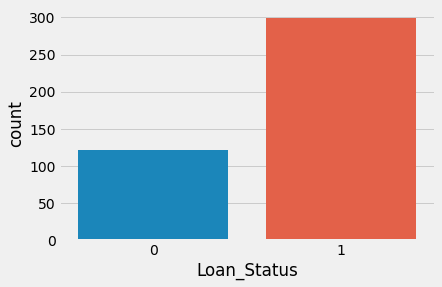

In [32]:
# libraries for visualization
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
#seeing the distribution of target variable
sns.countplot(loan_data1['Loan_Status'])
plt.show()

In [33]:
# Drop irrelevant columns - Ticket and Name (may be passenger ID too - if not set it as index)
del loan_data1['Unnamed: 0']
del loan_data1['Loan_ID']

loan_data1 = pd.get_dummies(loan_data1, columns=['Gender'])
loan_data1 = pd.get_dummies(loan_data1, columns=['Married'])
loan_data1 = pd.get_dummies(loan_data1, columns=['Dependents'])
loan_data1 = pd.get_dummies(loan_data1, columns=['Education'])
loan_data1 = pd.get_dummies(loan_data1, columns=['Self_Employed'])
loan_data1 = pd.get_dummies(loan_data1, columns=['Property_Area'])

loan_data1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Gender_Not Specified,Married_No,Married_Not Specified,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Not Specified,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.0,1.0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,5703,0.0,130.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
2,4333,2451.0,110.0,360.0,1.0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1
4,6700,1750.0,230.0,300.0,1.0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
5,4344,736.0,87.0,360.0,1.0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0


In [34]:
# Drop irrelevant columns - Ticket and Name (may be passenger ID too - if not set it as index)
del test_data['Loan_ID']

test_data = pd.get_dummies(test_data, columns=['Gender'])
test_data = pd.get_dummies(test_data, columns=['Married'])
test_data = pd.get_dummies(test_data, columns=['Dependents'])
test_data = pd.get_dummies(test_data, columns=['Education'])
test_data = pd.get_dummies(test_data, columns=['Self_Employed'])
test_data = pd.get_dummies(test_data, columns=['Property_Area'])

test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_Not Specified,Married_No,Married_Not Specified,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Not Specified,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3748,1668.0,110.0,360.0,1.0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0
1,4000,7750.0,290.0,360.0,1.0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0
2,2625,6250.0,187.0,360.0,1.0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
3,3902,1666.0,109.0,360.0,1.0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
4,6096,0.0,218.0,360.0,0.0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0


In [35]:
X = loan_data1.drop('Loan_Status', axis = 1)              # Input Variables/features
y = loan_data1.Loan_Status                                # output variables/features

In [36]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape

((315, 23), (105, 23))

## Build a Logistic Regression Model on train set

In [37]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
print("Training sub dataset, F1 score: ", f1_score(y_train, lr.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, lr.predict(X_test)))

Training sub dataset, F1 score:  0.8839103869653767
Test sub dataset, F1 score:  0.8363636363636364


In [39]:
predictions_lr = lr.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_lr) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_lr.csv')         
files.download('Assignment3_prediction_lr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
parameters_lr = {
     'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']}

lr1 = LogisticRegression(random_state = 1)

# Grid search cv
grid_search_lr  = GridSearchCV(estimator = lr1, param_grid = parameters_lr, 
                          cv = 5, n_jobs = -1, verbose = 1, scoring='f1')

In [41]:
grid_search_lr.fit(X_train, y_train)
grid_search_lr.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


{'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}

In [42]:
print("Training sub dataset, F1 score: ", f1_score(y_train, grid_search_lr.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, grid_search_lr.predict(X_test)))

Training sub dataset, F1 score:  0.8911290322580645
Test sub dataset, F1 score:  0.8848484848484848


In [43]:
predictions_lr1 = grid_search_lr.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_lr1) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_lr_GridSearch.csv')         
files.download('Assignment3_prediction_lr_GridSearch.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Build a Random Forest Model on train set


In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [45]:
print("Training sub dataset, F1 score: ", f1_score(y_train, rf.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, rf.predict(X_test)))

Training sub dataset, F1 score:  0.901010101010101
Test sub dataset, F1 score:  0.8834355828220859


In [46]:
predictions_rf1 = rf.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_rf1) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_rf.csv')         
files.download('Assignment3_prediction_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
parameters_rf = {
'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200]}
rf2 = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search_rf  = GridSearchCV(estimator = rf2, param_grid = parameters_rf, 
                          cv = 5, n_jobs = -1, verbose = 1, scoring='f1')

In [48]:
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   17.7s finished


{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [49]:
print("Training sub dataset, F1 score: ", f1_score(y_train, grid_search_rf.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, grid_search_rf.predict(X_test)))

Training sub dataset, F1 score:  0.9263157894736842
Test sub dataset, F1 score:  0.8834355828220859


In [50]:
predictions_rf2 = grid_search_rf.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_rf2) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_rf_GridSearch.csv')         
files.download('Assignment3_prediction_rf_GridSearch.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Build a Decision Tree Model on train set

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1, max_depth= 10, min_samples_leaf= 2, min_samples_split= 3, max_leaf_nodes=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=3, min_samples_leaf=2,
                       min_samples_split=3, random_state=1)

In [52]:
print("Training sub dataset, F1 score: ", f1_score(y_train, dt.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, dt.predict(X_test)))

Training sub dataset, F1 score:  0.8870967741935485
Test sub dataset, F1 score:  0.8902439024390244


In [53]:
predictions_dt1 = dt.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_dt1) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_dt.csv')         
files.download('Assignment3_prediction_dt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
parameters_dt = {
        'max_depth': (10, 30, 50, 100, 150, 200),
        'min_samples_split': (1, 2, 3),
        'min_samples_leaf': (1, 2, 3),
        'max_leaf_nodes': (5, 10, 15, 20),
        'min_samples_split': (4, 6, 8, 10)
}
dt2 = DecisionTreeClassifier(random_state = 1)

# Grid search cv
grid_search_dt  = GridSearchCV(estimator = dt2, param_grid = parameters_dt, 
                          cv = cv, n_jobs = -1, verbose = 1, scoring='f1')

In [55]:
grid_search_dt.fit(X_train, y_train)
grid_search_dt.best_params_

Fitting 315 folds for each of 288 candidates, totalling 90720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2730 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 6730 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 12330 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 19530 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 28330 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 38730 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 50730 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 64330 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 79530 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 90720 out of 90720 | elapsed: 10.2min finished


{'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [56]:
print("Training sub dataset, F1 score: ", f1_score(y_train, grid_search_dt.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, grid_search_dt.predict(X_test)))

Training sub dataset, F1 score:  0.8906882591093118
Test sub dataset, F1 score:  0.8902439024390244


In [57]:
predictions_dt2 = grid_search_dt.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_dt2) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_GridSearch_dt.csv')         
files.download('Assignment3_prediction_GridSearch_dt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Build a Gradient Booster Model on train set

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1, max_depth=10,min_samples_split=3,learning_rate=0.1,max_features=7)
 
gb.fit(X_train, y_train)
print("Training sub dataset, F1 score: ", f1_score(y_train, gb.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, gb.predict(X_test)))

Training sub dataset, F1 score:  1.0
Test sub dataset, F1 score:  0.8235294117647058


In [59]:
predictions_gb1 = gb.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_gb1) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_gb.csv')         
files.download('Assignment3_prediction_gb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
parameters_gb ={
'min_samples_split': [2,3,4,5],
'max_depth': [3,5,7,9,None],
'learning_rate': [0.05,0.1, 0.15, 0.2, 0.3]}

gb2 = GradientBoostingClassifier(random_state = 1)

# Grid search cv
grid_search_gb  = GridSearchCV(estimator = gb2, param_grid = parameters_gb, 
                          cv = cv, n_jobs = -1, verbose = 1, scoring='f1')

In [61]:
grid_search_gb.fit(X_train, y_train)
grid_search_gb.best_params_

Fitting 315 folds for each of 100 candidates, totalling 31500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2}

In [63]:
print("Training sub dataset, F1 score: ", f1_score(y_train, grid_search_gb.predict(X_train)))
print("Test sub dataset, F1 score: ", f1_score(y_test, grid_search_gb.predict(X_test)))

Training sub dataset, F1 score:  0.9253112033195021
Test sub dataset, F1 score:  0.8805031446540881


In [64]:
predictions_gb2 = grid_search_gb.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_gb2) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_GridSearch_gb.csv')         
files.download('Assignment3_prediction_GridSearch_gb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Build a Neural Network Model on train set

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

dl = keras.Sequential([
    keras.layers.Flatten(input_shape=(23,)),
    #keras.layers.Dense(13, activation=tf.nn.relu, input_shape=(13,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

dl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

dl.fit(X_train, y_train, epochs=100, batch_size=5)

test_loss, test_acc = dl.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: 53.4162 - accuracy: 0.6282
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 33.2352 - accuracy: 0.5948
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 25.1803 - accuracy: 0.5744
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 31.3142 - accuracy: 0.5398
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 10.0449 - accuracy: 0.6166
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 14.0580 - accuracy: 0.6223
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 9.9439 - accuracy: 0.6140
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 8.8008 - accuracy: 0.5584
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 6.5964 - accuracy: 0.5847
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 5.3591 - accuracy: 0.5742
Epo

In [67]:
predictions_dl1 = dl.predict_classes(test_data)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_dl1) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

from google.colab import files
res.to_csv('Assignment3_prediction_dl.csv')         
files.download('Assignment3_prediction_dl.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>